In [5]:
using Plots: scatter, scatter!, plot, plot!
using Flux
using StaticArrays
using Random: randperm

In [6]:
n = 100
dx = rand(n)
dy = sin.(4*pi*dx) + 0.1*randn(n);

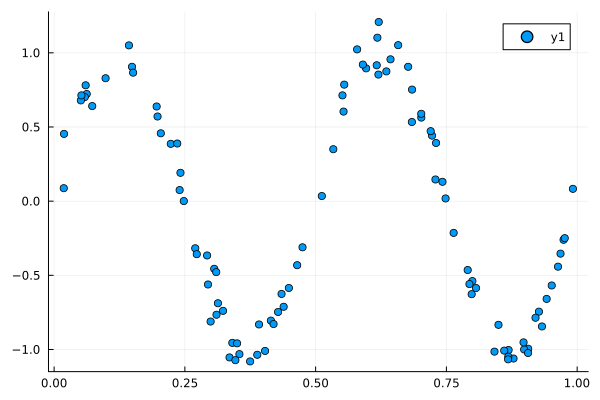

In [7]:
scatter(dx, dy)

In [17]:
m = Chain(Dense(1=>50,σ), Dense(50=>50,σ), Dense(50=>1))

Chain(
  Dense(1 => 50, σ),                    # 100 parameters
  Dense(50 => 50, σ),                   # 2_550 parameters
  Dense(50 => 1),                       # 51 parameters
)                   # Total: 6 arrays, 2_701 parameters, 10.926 KiB.

In [9]:
# loss(x, y) = Flux.mse(m(x), y)
loss(x, y) = sum((m(x)-y).^2)

loss (generic function with 1 method)

In [10]:
data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)]

100-element Vector{Tuple{SVector{1, Float64}, SVector{1, Float64}}}:
 ([0.19777194963836509], [0.5707103529765886])
 ([0.9513741703921275], [-0.5685806753787763])
 ([0.684007739075089], [0.5336589700284937])
 ([0.0623046907483682], [0.722485320466193])
 ([0.391785494573621], [-0.8313598783728744])
 ([0.7638741574996051], [-0.2139160397978658])
 ([0.8689095554947888], [-1.003521645096243])
 ([0.5513217020965621], [0.713275450563276])
 ([0.07287614933451703], [0.6409838502984584])
 ([0.3884388409252104], [-1.0358825558906217])
 ([0.05862504990996309], [0.7017737760668068])
 ([0.7996804796520428], [-0.5388715538592139])
 ([0.9919058370898992], [0.0830968700184487])
 ⋮
 ([0.2698525722919699], [-0.31769300442231413])
 ([0.9740317697425568], [-0.2604460822289557])
 ([0.7484529208686922], [0.01820259955092351])
 ([0.8680271431993563], [-1.0665169067991793])
 ([0.6843919607652225], [0.7521740200168235])
 ([0.620645874401626], [1.2079255625146486])
 ([0.2727456204143933], [-0.3574177354655956])

2000

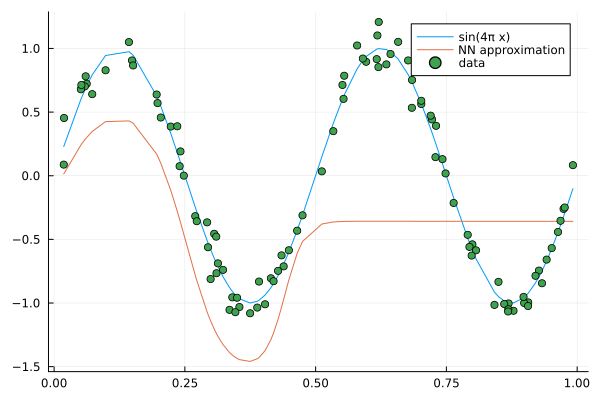

In [19]:
for i in 1:2000
    Flux.train!(loss, Flux.params(m), data, Descent(0.1))
    if i%50 == 0
        p = plot(sort(dx), x->(sin(4*pi*x)), label="sin(4π x)")
        plot!(p, sort(dx), first.(m.(SVector.(sort(dx)))), label="NN approximation")
        scatter!(p, dx, dy, label="data")
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end

In [ ]:
mynl(x) = min(1.0, max(0.0, x^2))
plot(mynl)

In [ ]:
m = Chain(Dense(1=>50,mynl), Dense(50=>50,mynl), Dense(50=>1))

In [ ]:
@which Dense(50=>50, σ)

In [21]:
using Zygote

In [22]:
f(x) = 5x+3

f (generic function with 1 method)

In [23]:
f'(10)

5.0

In [24]:
@code_llvm f'(1)

;  @ /home/zach/.julia/packages/Zygote/g2w9o/src/compiler/interface.jl:102 within `#64`
define double @"julia_#64_9630"(i64 signext %0) #0 {
top:
;  @ /home/zach/.julia/packages/Zygote/g2w9o/src/compiler/interface.jl:104 within `#64`
  ret double 5.000000e+00
}


In [25]:
function g(x)
    y = zero(x)
    for i in 1:10
        y += x
    end
    return y
end

g (generic function with 1 method)

In [26]:
g'(5)

10.0

In [27]:
using BenchmarkTools
@benchmark g'(5)

BenchmarkTools.Trial: 10000 samples with 4 evaluations.
 Range (min … max):   7.287 μs …  3.615 ms  ┊ GC (min … max): 0.00% … 99.57%
 Time  (median):      9.509 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   11.091 μs ± 36.247 μs  ┊ GC (mean ± σ):  3.25% ±  1.00%

  █▁     ▄▅▂▃▁                                                 
  ██▇▇▃▅██████▅▅▃▃▄▂▄▃▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▃▃▂▃▃▂▂▂▂▁▁▁▁▁ ▂
  7.29 μs         Histogram: frequency by time        22.1 μs <

 Memory estimate: 4.53 KiB, allocs estimate: 90.

In [28]:
@benchmark g(5)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  3.027 ns … 17.959 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     3.499 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   3.519 ns ±  0.478 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

        ▄█                     ▁                 ▇         ▇  
  ▄▂▁▁▁▁██▂▁▁▁▁▇▆▁▁▁▂▁▃█▁▁▁▁▁▁▄█▁▁▁▁▁▁▁▄▃▁▁▁▁▁▁▁▇█▂▂▁▁▁▁▁▁▄█ ▃
  3.03 ns        Histogram: frequency by time        3.97 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [ ]:
xs = collect(0.0:0.02:2.0)
scatter(xs, first.(m.(SVector.(xs))))


In [43]:
n = 100
f(x) = cos.(20*(x)^2)
approaches = Dict()

function add_approach!(approaches; name, dx)
    
    dy = f.(dx)
    m = Chain(Dense(1,50,σ), Dense(50,50,σ), Dense(50,1))
    loss = (x,y) -> sum((m(x)-y).^2)
    
    approaches[name] = (
        dx = dx,
        dy = dy,
        data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)],
        m = m,
        loss = loss
    )
end

add_approach!(approaches, name="random", dx = rand(n))
add_approach!(approaches, name="linrange", dx = LinRange(0,1,n))

(dx = LinRange{Float64}(0.0, 1.0, 100), dy = [1.0, 0.9999979179600111, 0.9999666875335731, 0.9998313594425318, 0.9994670449248038, 0.998699006750542, 0.9973028885125452, 0.9950051838306286, 0.9914840755977954, 0.9863708030757867  …  -0.6815172719185082, -0.3713698147604952, -0.007052567601621131, 0.36204414556613124, 0.6831399088335544, 0.9076825947266263, 0.9990621966374388, 0.9391923207191087, 0.7327484203413519, 0.40808206181339196], data = Tuple{SVector{1, Float64}, SVector{1, Float64}}[([0.0], [1.0]), ([0.010101010101010102], [0.9999979179600111]), ([0.020202020202020204], [0.9999666875335731]), ([0.030303030303030304], [0.9998313594425318]), ([0.04040404040404041], [0.9994670449248038]), ([0.050505050505050504], [0.998699006750542]), ([0.06060606060606061], [0.9973028885125452]), ([0.0707070707070707], [0.9950051838306286]), ([0.08080808080808081], [0.9914840755977954]), ([0.09090909090909091], [0.9863708030757867])  …  ([0.9090909090909091], [-0.6815172719185082]), ([0.919191919

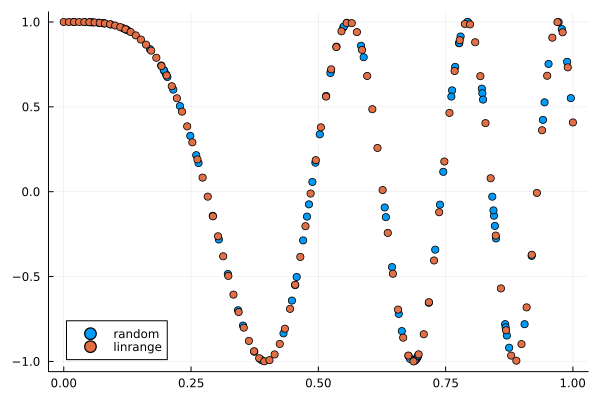

In [44]:
p = plot()
for (k, v) in approaches
    scatter!(p, v.dx, v.dy, label=k)
end
p

4000

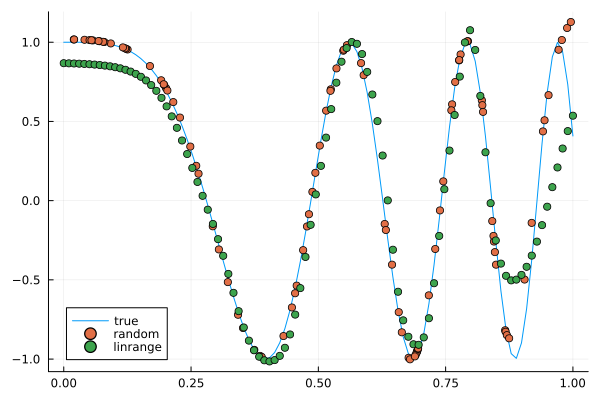

In [45]:
for i in 1:4000
    p = plot(LinRange(0,1,n), f, label="true")
    for (k,v) in approaches
        Flux.train!(v.loss, Flux.params(v.m), v.data, ADAM())
        if i%10 == 0
            scatter!(p, v.dx, [first(y) for y in v.m.(d[1] for d in v.data)], label=k)
        end
    end
    if i%20 == 0
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end

In [ ]:
m